<a href="https://colab.research.google.com/github/ranjiGT/Scyther/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='red'>***video link***</font> --> https://youtu.be/sdnRsp4EgLI

<font color='red'>***Linear Regression (Conceptual video)***</font> --> https://youtu.be/e9VYOWWP6zM
#<font color='redr'> ***Linear Regression on Auto '85***</font>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("auto.csv")

df.columns = ['symboling','normalized_losses','make','fuel_type','aspiration','nr.doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_wt','engine_type','nr.cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','HP','peak_rpm','city_MPG','highway_MPG','Price']

In [ ]:
df.dropna().columns

In [ ]:
df.dtypes

In [ ]:
#One time activity to remove all low variance filters
df = df.drop('make', axis=1).drop('fuel_type', axis=1).drop('engine_location', axis=1).drop('nr.doors',axis=1).drop('body_style', axis=1).drop('drive_wheels', axis=1).drop('engine_type', axis=1).drop('fuel_system', axis=1).drop('aspiration', axis=1).drop('normalized_losses', axis=1)
df

In [ ]:
df['nr.cylinders'].value_counts()

In [ ]:
df['cylinder_conv'] = df['nr.cylinders'].replace({'two':2, 'three':3, 'four':4, 'five':5,'six':6, 'eight':8, 'twelve':12})
df=df.drop('nr.cylinders', axis=1)
df

In [ ]:
df=df.replace('?', np.nan)
df

<font color ='redr'>***Changing all data types to numeric (preferrably float)***</font>

In [ ]:
df['bore']=df['bore'].astype('float64')
df['stroke']=df['stroke'].astype('float64')
df['HP']=df['HP'].astype('float64')
df['peak_rpm']=df['peak_rpm'].astype('float64')
df['Price']=df['Price'].astype('float64')

In [ ]:
df['bore']=df['bore'].fillna(df['bore'].median()) #means are easily impacted by outliers and so replace with median values; can also calculate the median of an object values
df['stroke']=df['stroke'].fillna(df['stroke'].median())
df['HP']=df['HP'].fillna(df['HP'].median())
df['peak_rpm']=df['peak_rpm'].fillna(df['peak_rpm'].median())
df['Price']=df['Price'].fillna(df['Price'].median())
df['cylinder_conv']=df['cylinder_conv'].fillna(df['cylinder_conv'].median())

In [ ]:
df.describe(include='all').transpose()

In [ ]:
import seaborn as sns
sns.pairplot(df, diag_kind='kde')

In [ ]:
X = df.drop('Price', axis=1) #to be predicted
X

In [ ]:
Y = df[['Price']]
Y

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.25, random_state=1)
model = LinearRegression()
model.fit(trainX, trainY)

<font color='brown'>***Partial derivatives***</font> 

In [ ]:
for idx, col_name in enumerate(trainX.columns):
  print("The coefficient for {} is {}". format(col_name, model.coef_[0][idx]))

In [ ]:
model.intercept_

In [ ]:
model.coef_

In [ ]:
model.score(testX,testY) #variance explained by your model

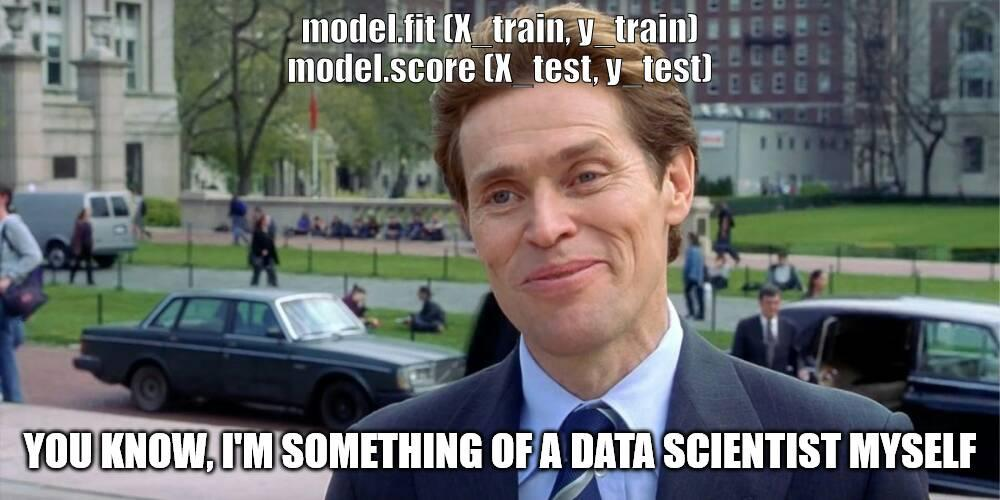